# Talent Data Analysis and Visualization
On this section, I would like to give some insights and visualizations for talent datasets.

In [137]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Let's take a look at the data

In [138]:
df = pd.read_csv("Analytics Test - Answer - data.csv")

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   talent_id            206 non-null    object 
 1   management           226 non-null    object 
 2   deals_no             226 non-null    object 
 3   invoice_no           226 non-null    object 
 4   deal_status          226 non-null    object 
 5   payment_status       226 non-null    object 
 6   deal_date            226 non-null    object 
 7   talent_manager       226 non-null    object 
 8   talent_name          226 non-null    object 
 9   talent_grade         226 non-null    object 
 10  Gender               226 non-null    object 
 11  nationality          226 non-null    object 
 12  client_name          226 non-null    object 
 13  deal_description     226 non-null    object 
 14  deal_category        226 non-null    object 
 15  deal_type            226 non-null    obj

Before doing analysis we need to change several variables into numeric one, and also change the date variable into correct format:

In [140]:
df['Deals Worth (USD)'] = df['Deals Worth (USD)'].replace('[^\d.]+','',regex=True).astype('float')
df['Take Rate (USD)'] = df['Take Rate (USD)'].replace('[^\d.]+','',regex=True).astype('float')
df['Internal Cost (USD)'] = df['Internal Cost (USD)'].replace('[^\d.]+','',regex=True).astype('float')
df['Revenue (USD)'] = df['Revenue (USD)'].replace('[^\d.]+','',regex=True).astype('float')
df['Profit (USD)'] = df['Profit (USD)'].replace('[^\d.]+','',regex=True).astype('float')
df['deal_date'] = pd.to_datetime(df['deal_date'])


## Statistics Summary:

In [141]:
df.describe()

,deal_note,Deals Worth (USD),Take Rate (USD),Internal Cost (USD),Revenue (USD),Profit (USD)
count,0.0,226.000000,226.000000,21.000000,226.000000,226.000000
mean,NaN,1074.110221,322.232960,32.625238,751.876863,748.845398
std,NaN,3052.719354,915.815835,28.546625,2136.903598,2137.610057
min,NaN,12.500000,3.750000,0.630000,8.750000,8.750000
25%,NaN,98.700000,29.610000,2.900000,69.091000,63.042500
50%,NaN,244.645000,73.393000,35.710000,171.250000,167.500000
75%,NaN,614.647500,184.395000,71.430000,430.254750,420.000000
max,NaN,37500.000000,11250.000000,72.610000,26250.000000,26250.000000


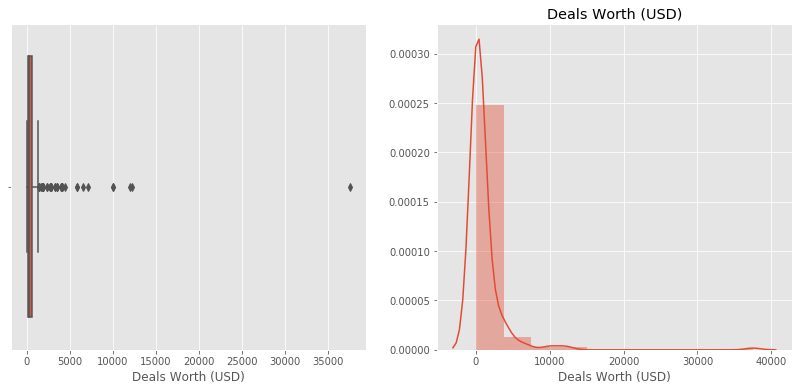

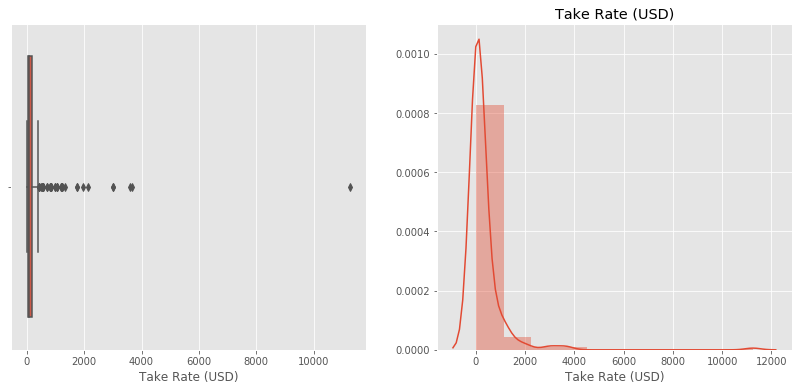

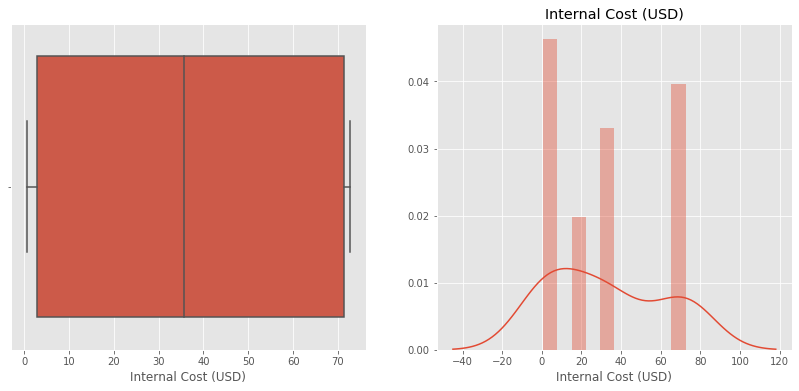

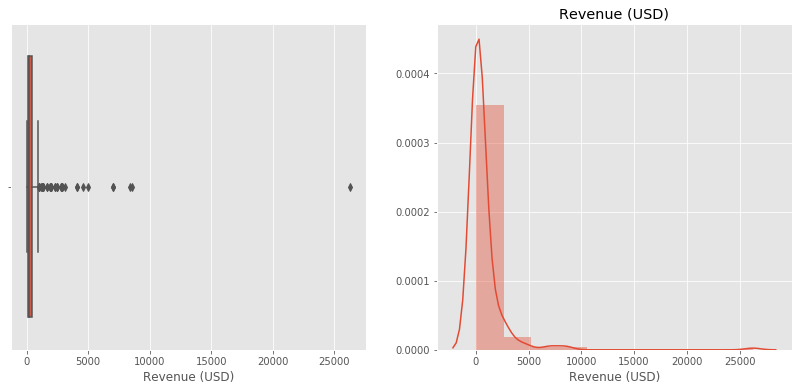

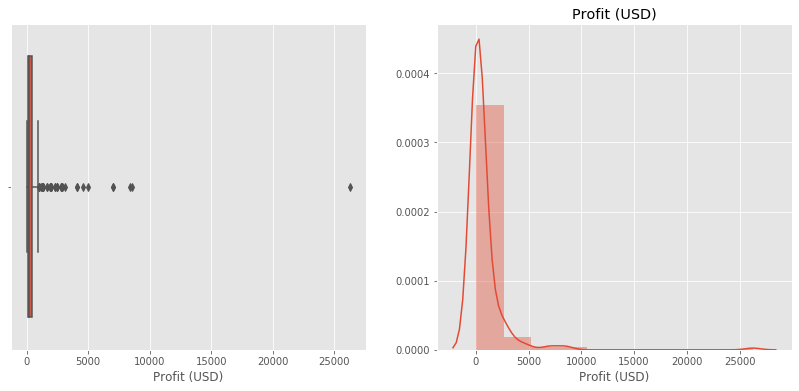

In [142]:
plots = ['Deals Worth (USD)', 'Take Rate (USD)', 'Internal Cost (USD)','Revenue (USD)','Profit (USD)']
for i in plots:
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(df[i])
    plt.subplot(1,2,2)
    sns.distplot(df[i],bins= 10)    
    plt.title(i)    
    plt.show()

There are huge gap between mean and median in our dataset (except for internal cost) which indicate there are large outliers in our dataset. It was proved in the boxplot above that show us there are many outliers above 75th percentile.

# Talent and Management
In this section, we would like to see which talents and management contribute the most throughout the week.

In [143]:
df.groupby(['talent_name']).sum()['Deals Worth (USD)'].reset_index().sort_values('Deals Worth (USD)', ascending=False).describe()

,Deals Worth (USD)
count,75.000000
mean,3236.652133
std,13410.801715
min,12.500000
25%,138.350000
50%,285.710000
75%,548.140000
max,108899.510000


In the table above we could see that even after we classified the deals worth by talent, there are still huge gap between deals worth that produced by each talents.

### Which talents that features the most throughout the week?

In [144]:
df['talent_name'].value_counts().head(10)

Pross          20
Gushion        19
Ang            19
Andika         10
Cep             7
Listyani        7
Ejeh            6
Franzeska       6
Sebastianus     6
Angel           6
Name: talent_name, dtype: int64

### Which talents has the most deals worth over the week?

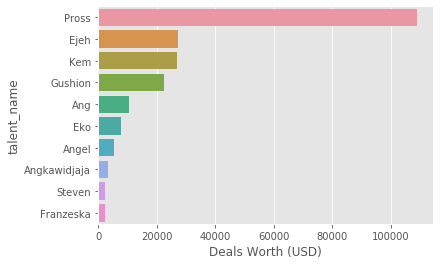

In [145]:
talent_top_dealsworth = df.groupby(['talent_name']).sum()['Deals Worth (USD)'].reset_index().sort_values('Deals Worth (USD)', ascending=False).head(10)
sns.barplot(y='talent_name',x='Deals Worth (USD)', data = talent_top_dealsworth, orient='h')

## Which talents has the least deals worth over the week?

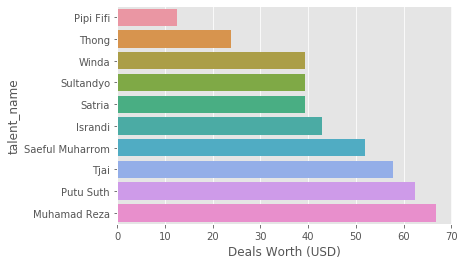

In [146]:
talent_bottom_dealsworth = df.groupby(['talent_name']).sum()['Deals Worth (USD)'].reset_index().sort_values('Deals Worth (USD)').head(10)
sns.barplot(y='talent_name',x='Deals Worth (USD)', data = talent_bottom_dealsworth, orient='h')

### On average, which talents has the most deals worth over the week?

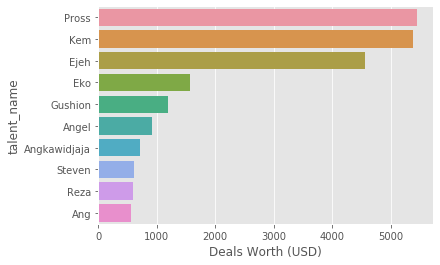

In [147]:
talent_top_dealsworth = df.groupby(['talent_name']).mean()['Deals Worth (USD)'].reset_index().sort_values('Deals Worth (USD)', ascending=False).head(10)
sns.barplot(y='talent_name',x='Deals Worth (USD)', data = talent_top_dealsworth, orient='h')

## Which management contributes the most?

In [148]:
df['management'].value_counts().head(10)

ABC    141
GHI     54
DEF     24
JKL      7
Name: management, dtype: int64

Text(0.5, 1.0, 'Deals Worth Per Management')

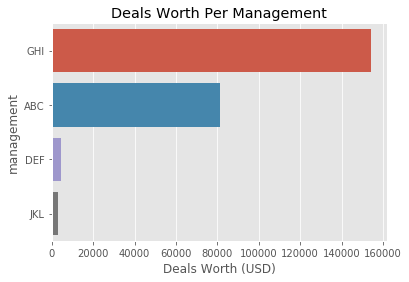

In [149]:
talent_bottom_dealsworth = df.groupby(['management']).sum()['Deals Worth (USD)'].reset_index().sort_values('Deals Worth (USD)', ascending = False).head(10)
sns.barplot(y='management',x='Deals Worth (USD)', data = talent_bottom_dealsworth, orient='h')
plt.title('Deals Worth Per Management')

Text(0.5, 1.0, 'Deals Worth Average Per Management')

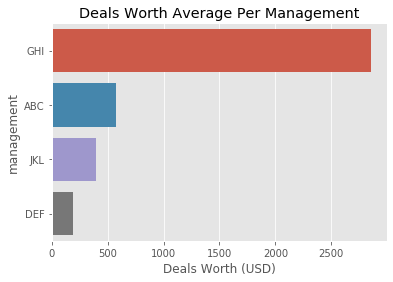

In [150]:
talent_bottom_dealsworth = df.groupby(['management']).mean()['Deals Worth (USD)'].reset_index().sort_values('Deals Worth (USD)', ascending = False).head(10)
sns.barplot(y='management',x='Deals Worth (USD)', data = talent_bottom_dealsworth, orient='h')
plt.title('Deals Worth Average Per Management')

From the graphics above, Pross is the talent who features the most and produces the highest deals worth on the week, while GHI is the management who contributes the most although only features nearly 100 less than ABC management throughout the week.

## Unpaid Deals

### How many unpaid deals compare to paid deals?

In [151]:
df['payment_status'].value_counts()

Paid      152
Unpaid     74
Name: payment_status, dtype: int64

### Then, how many the deal worths?

In [152]:
df.groupby('payment_status').sum()['Deals Worth (USD)'].reset_index()

,payment_status,Deals Worth (USD)
0,Paid,168913.42
1,Unpaid,73835.49


### How many the paid and unpaid deal for each management?

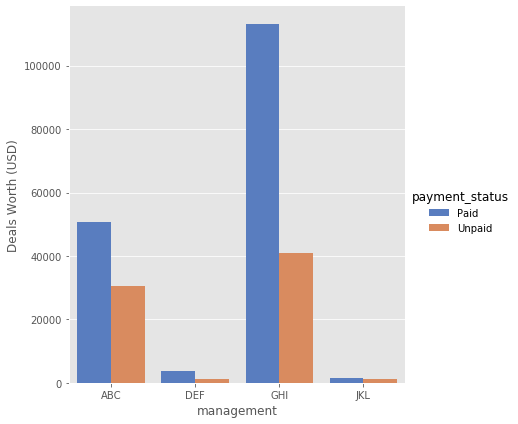

In [153]:
mp = df.groupby(['payment_status', 'management']).sum()['Deals Worth (USD)'].reset_index()
sns.catplot(x='management', y='Deals Worth (USD)', hue = 'payment_status', height=6, kind="bar", palette="muted",data=mp)

### How many the paid and unpaid deal for each day?

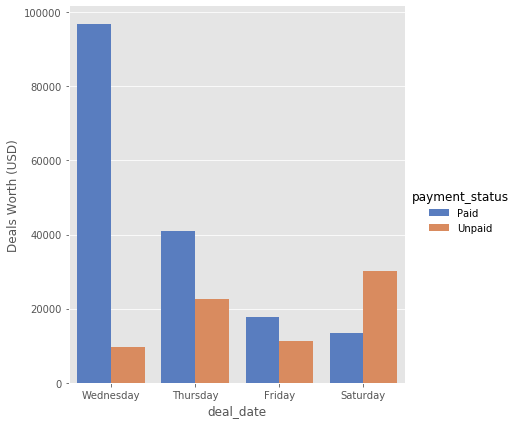

In [154]:
date = df.groupby(['deal_date','payment_status']).sum()['Deals Worth (USD)'].reset_index()
date['deal_date'] = date['deal_date'].dt.day_name()
sns.catplot(x='deal_date', y='Deals Worth (USD)', hue = 'payment_status', height=6, kind="bar", palette="muted",data=date)

Most of deals, nearly 70% has been paid on the week, while GHI management is the management that has the most unpaid deals throughout the week. Unpaid deal only overpass paid deal in the weekend.  

## Deal Type

### How many deal type counted in the data?

In [155]:
df['deal_type'].value_counts()

Endorsement    189
Event           31
Streaming        6
Name: deal_type, dtype: int64

### Which category contributes the most?

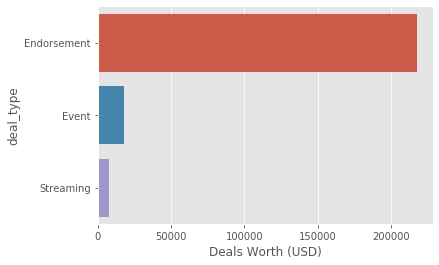

In [156]:
dt = df.groupby('deal_type').sum()['Deals Worth (USD)'].reset_index()
sns.barplot(y='deal_type',x='Deals Worth (USD)', data = dt, orient='h')

The high total deals worth of endorsement is caused by high number of endorsements in our dataset, how many on average?

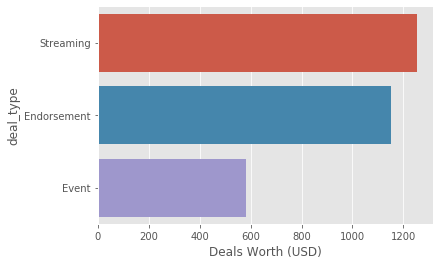

In [157]:
dt = df.groupby('deal_type').mean()['Deals Worth (USD)'].reset_index().sort_values('Deals Worth (USD)', ascending = False)
sns.barplot(y='deal_type',x='Deals Worth (USD)', data = dt, orient='h')

While endoserment is the deal type that contributes the most, however on average streaming produces highest deal worths on the week.

## Deal Category

In [158]:
df['deal_category'].value_counts()


Gaming        128
Non Gaming     98
Name: deal_category, dtype: int64

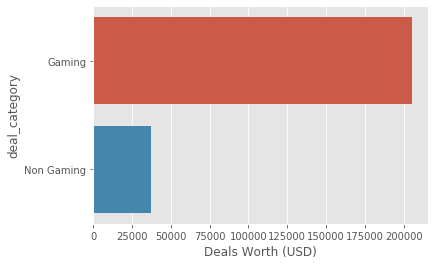

In [159]:
dt = df.groupby('deal_category').sum()['Deals Worth (USD)'].reset_index()
sns.barplot(y='deal_category',x='Deals Worth (USD)', data = dt, orient='h')

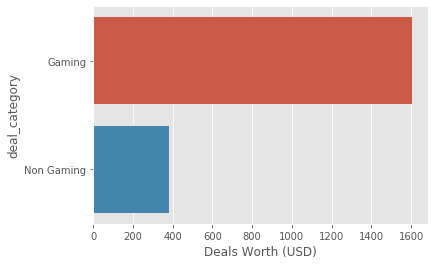

In [160]:
dt = df.groupby('deal_category').mean()['Deals Worth (USD)'].reset_index()
sns.barplot(y='deal_category',x='Deals Worth (USD)', data = dt, orient='h')

From the graphs above, it is clear that gaming is the category that most dominant in our dataset.

## Combined

Now, we would like to dig deep deal category and deal type more:

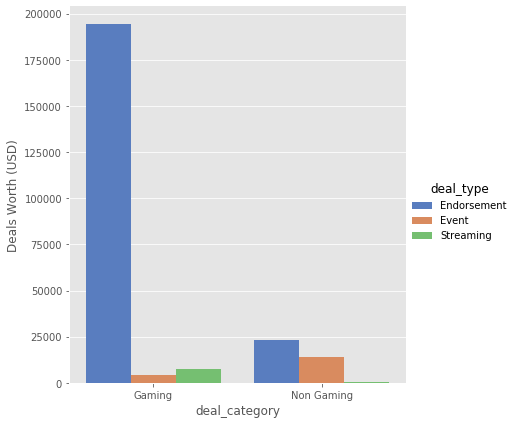

In [161]:
dt = df.groupby(['deal_category','deal_type']).sum()['Deals Worth (USD)'].reset_index()
sns.catplot(x='deal_category', y='Deals Worth (USD)', hue = 'deal_type', height=6, kind="bar", palette="muted",data=dt)

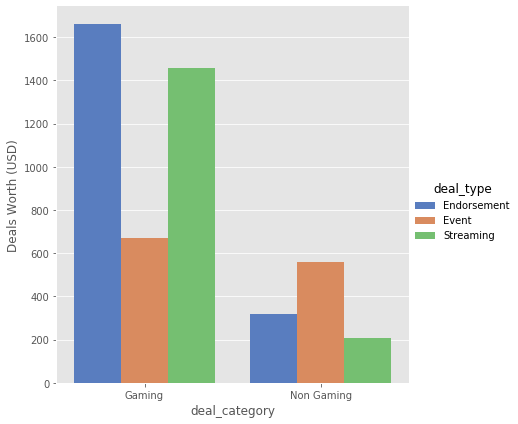

In [162]:
dt = df.groupby(['deal_category','deal_type']).mean()['Deals Worth (USD)'].reset_index()
sns.catplot(x='deal_category', y='Deals Worth (USD)', hue = 'deal_type', height=6, kind="bar", palette="muted",data=dt)

On the gaming category, although event is most dominant deal type on total deals worth on the week, however on average streaming is not too far from the event. However in non-gaming category, streaming is not as promising as in the gaming category as event and endorsement are dominating.

### Which one features the most?


In [163]:
df.groupby(['management','client_name', 'deal_category','deal_type'])['Deals Worth (USD)'].count().reset_index().sort_values('Deals Worth (USD)', ascending=False).head(10).rename({'Deals Worth (USD)':'Count'}, axis=1) 

,management,client_name,deal_category,deal_type,Count
5,ABC,Cruz del Valle,Gaming,Endorsement,18
35,ABC,Pochinki,Non Gaming,Endorsement,12
82,GHI,Yasnaya Polyana,Gaming,Endorsement,10
56,DEF,Volnova,Gaming,Endorsement,10
46,ABC,Yasnaya Polyana,Gaming,Endorsement,8
26,ABC,Mongnai,Non Gaming,Endorsement,8
43,ABC,Volnova,Gaming,Endorsement,7
42,ABC,Valle del Mar,Gaming,Endorsement,6
74,GHI,Sahmee,Gaming,Endorsement,5
55,DEF,Pochinki,Non Gaming,Endorsement,5


We could see that deal type of endorsement and gaming category feature most often here.

### Which one contributes the most?

In [164]:
df.groupby(['management','client_name', 'deal_category','deal_type'])['Deals Worth (USD)'].sum().reset_index().sort_values('Deals Worth (USD)', ascending=False).head(10)

,management,client_name,deal_category,deal_type,Deals Worth (USD)
58,GHI,Chumacera,Gaming,Endorsement,37500.00
82,GHI,Yasnaya Polyana,Gaming,Endorsement,31316.02
43,ABC,Volnova,Gaming,Endorsement,28906.61
78,GHI,Valle del Mar,Gaming,Endorsement,24592.13
66,GHI,La Cobreria,Gaming,Endorsement,14402.60
79,GHI,Volnova,Gaming,Endorsement,11755.36
74,GHI,Sahmee,Gaming,Endorsement,9486.36
62,GHI,Georgopol,Gaming,Streaming,7142.86
17,ABC,Ha Tinh,Gaming,Endorsement,4018.00
22,ABC,Los Higos,Gaming,Endorsement,4000.00


In total, client named Chumacera from GHI management produced the most deal worth during the week. It is interesting to see in the table that Volnova is mentioned twice as he representeed by two different managements.

### On average, which one the highest?

In [165]:
df.groupby(['management','client_name', 'deal_category','deal_type'])['Deals Worth (USD)'].mean().reset_index().sort_values('Deals Worth (USD)', ascending=False).head(10)

,management,client_name,deal_category,deal_type,Deals Worth (USD)
58,GHI,Chumacera,Gaming,Endorsement,37500.000000
62,GHI,Georgopol,Gaming,Streaming,7142.860000
79,GHI,Volnova,Gaming,Endorsement,5877.680000
78,GHI,Valle del Mar,Gaming,Endorsement,4918.426000
43,ABC,Volnova,Gaming,Endorsement,4129.515714
17,ABC,Ha Tinh,Gaming,Endorsement,4018.000000
22,ABC,Los Higos,Gaming,Endorsement,4000.000000
66,GHI,La Cobreria,Gaming,Endorsement,3600.650000
80,GHI,Volnova,Non Gaming,Endorsement,3571.430000
82,GHI,Yasnaya Polyana,Gaming,Endorsement,3131.602000


On average, Chumacera is still leading, however we could see that Georgopol on streaming climbed into second place.

# Conclusion


1. On total, talent/client named Pross gives us the most deal worth in the week, however when we classified it further, Chumacera from GHI management in the gaming category with endorsement deal is the most expensive deal in the week.
2. Gaming category with streaming deal is the most promising deal as even though only features very few in the week, the average deals worth is not too far from gaming category with endorsement deal. It is proven when we classified the data, Georgolol from gaming category with streaming deal type placed second on the highest average deals worth, more than most talent with gaming category and endorsement deal type.